In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from utils import first_order_diff, second_order_diff
from scipy.fft import fft

In [2]:
file_dir = Path("./amb_sin/")

In [3]:
file_dir

PosixPath('amb_sin')

In [4]:
files = list(map(lambda x: file_dir / Path(x), os.listdir(file_dir)))

In [5]:
files[24]

PosixPath('amb_sin/sine_fy_41Hz_0RPM.txt')

In [6]:
df = pd.read_csv(files[25], sep="\t")

In [7]:
df

,waveform,Pos_Ax [um],Pos_Ay [um],Pos_Bx [um],Pos_By [um],Ax+ [A],Ax- [A],Ay- [A],Ay+ [A],By+ [A],...,Bx- [A],Bx+ [A],F_Ax [N],F_Ay [N],F_Bx [N],F_By [N],Ex_Ax,Ex_Ay,Ex_Bx,Ex_By
0,t0,"24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757",...,"24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757","24/03/2019 00:36:31,185757"
1,delta t,"0,000195","0,000195","0,000195","0,000195","0,000195","0,000195","0,000195","0,000195","0,000195",...,"0,000195","0,000195","0,000195","0,000195","0,000195","0,000195","0,000195","0,000195","0,000195","0,000195"
2,time,Pos_Ax [um],Pos_Ay [um],Pos_Bx [um],Pos_By [um],Ax+ [A],Ax- [A],Ay- [A],Ay+ [A],By+ [A],...,Bx- [A],Bx+ [A],F_Ax [N],F_Ay [N],F_Bx [N],F_By [N],Ex_Ax,Ex_Ay,Ex_Bx,Ex_By
3,"24/03/2019 00:36:31,185757","1,070397E-7","6,858784E-5","-2,671963E-6","5,469813E-5","2,569351E+0","2,556021E+0","2,608975E+0","2,610245E+0","2,625121E+0",...,"2,639295E+0","2,697522E+0","2,958190E-1","7,313213E-2","2,066338E+0","-8,184812E-1","6,859591E-4","-2,097808E+0","2,302029E-3","-2,094572E+0"
4,"24/03/2019 00:36:31,185952","1,182130E-6","6,529718E-5","-4,634843E-6","5,227420E-5","2,567070E+0","2,551557E+0","2,608093E+0","2,617195E+0","2,628578E+0",...,"2,640591E+0","2,703672E+0","3,446841E-1","3,846926E-1","2,335203E+0","-8,535293E-1","7,110246E-4","-2,030341E+0","2,323335E-3","-2,027150E+0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56328,"24/03/2019 00:36:42,184976","3,952441E-6","7,508389E-5","9,088064E-7","6,147603E-5","2,567527E+0","2,557438E+0","2,611670E+0","2,607003E+0","2,622095E+0",...,"2,641735E+0","2,698637E+0","2,257723E-1","-1,061826E-1","2,083862E+0","-1,029467E+0","9,792255E-4","-2,319115E+0","2,156651E-3","-2,315492E+0"
56329,"24/03/2019 00:36:42,185171","1,883168E-6","7,418393E-5","-1,534413E-6","6,042151E-5","2,568080E+0","2,559254E+0","2,603943E+0","2,600700E+0","2,624580E+0",...,"2,638843E+0","2,700105E+0","1,855365E-1","-8,891207E-2","2,254035E+0","-7,438867E-1","8,789635E-4","-2,281743E+0","2,167930E-3","-2,278190E+0"
56330,"24/03/2019 00:36:42,185366","1,350666E-6","7,312870E-5","-3,376310E-6","5,861084E-5","2,565317E+0","2,547618E+0","2,608155E+0","2,611616E+0","2,627319E+0",...,"2,643631E+0","2,704939E+0","3,872702E-1","2,105617E-1","2,297800E+0","-7,989975E-1","9,579198E-4","-2,237266E+0","2,129079E-3","-2,233782E+0"
56331,"24/03/2019 00:36:42,185561","4,400777E-7","7,059194E-5","-5,434136E-6","5,781047E-5","2,565650E+0","2,545312E+0","2,608865E+0","2,610358E+0","2,622205E+0",...,"2,642913E+0","2,706058E+0","4,432610E-1","1,023834E-1","2,360491E+0","-1,001158E+0","8,137932E-4","-2,186327E+0","2,126573E-3","-2,182717E+0"


In [33]:
df = df.iloc[3:]
old_cols = ["waveform", "Pos_Ax [um]", "Pos_Ay [um]", "Pos_Bx [um]", "Pos_By [um]", "F_Ax [N]", "F_Ay [N]", "F_Bx [N]", "F_By [N]"]
new_cols = ["datetime", "ax", "ay", "bx", "by", "f_ax", "f_ay", "f_bx", "f_by"]
df = df[old_cols]
df.rename(columns = dict(zip(old_cols, new_cols)), inplace=True)

In [34]:
df["datetime"] = df["datetime"].apply(pd.to_datetime)

In [35]:
def to_float(x):
    if not isinstance(x, str):
        return x
    return float(x.replace(",", "."))

for col in [ "ax", "ay", "bx", "by", "f_ax", "f_ay", "f_bx", "f_by"]:
    df[col] = df[col].apply(to_float)

In [36]:
df = df.drop(df[pd.isnull(df["datetime"])].index)

In [41]:
(df["datetime"] - df["datetime"].shift()).mean()

Timedelta('0 days 00:00:00.000195312')

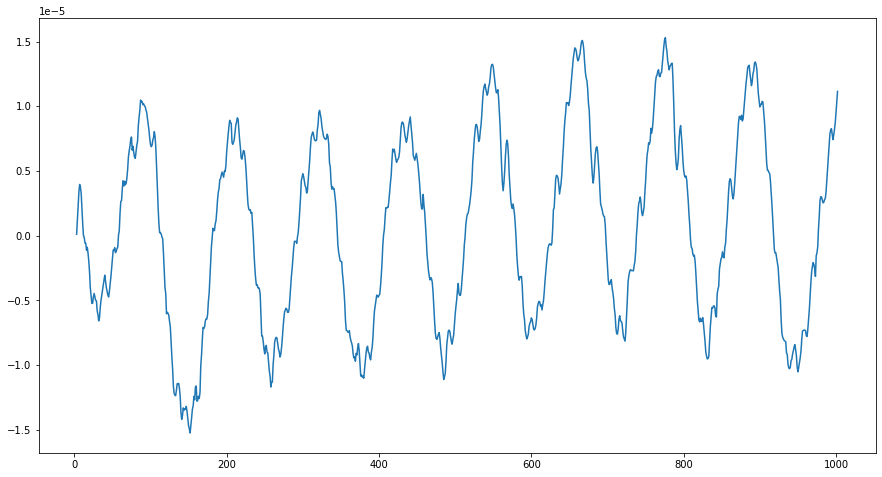

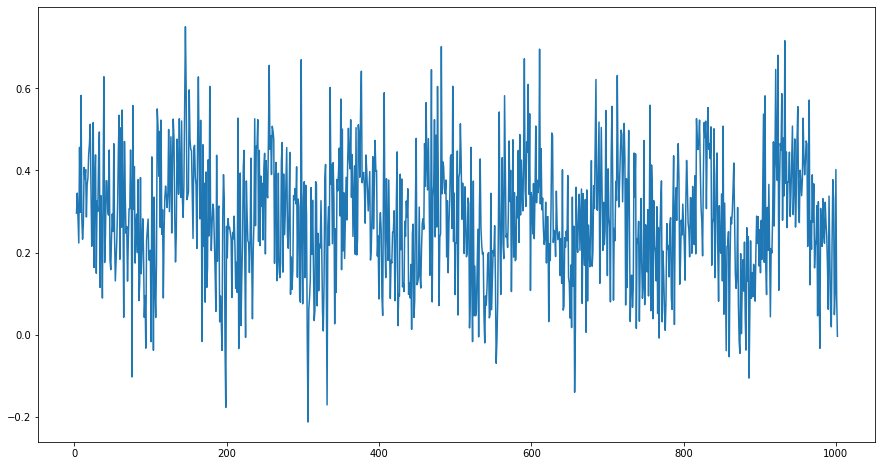

In [42]:
plt.figure(figsize=(15,8))
sel_df = df.iloc[:1000]
plt.plot(sel_df["ax"])
plt.show()
plt.figure(figsize=(15,8))
plt.plot(sel_df["f_ax"])
plt.show()

In [43]:
diff = first_order_diff(df[["ax"]].values.transpose(), 0.000195).transpose()
diff2 = second_order_diff(df[["ax"]].values.transpose(), 0.000195).transpose()

In [44]:
ax = df["ax"].iloc[1:-1].values.flatten()
axf = fft(ax)

/home/felipeangelim/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-1.0, 300.0)

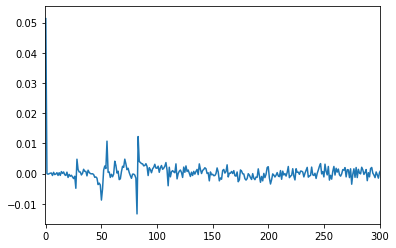

In [45]:
plt.plot(axf[0:df.shape[0]//2])
plt.xlim((-1, 300))

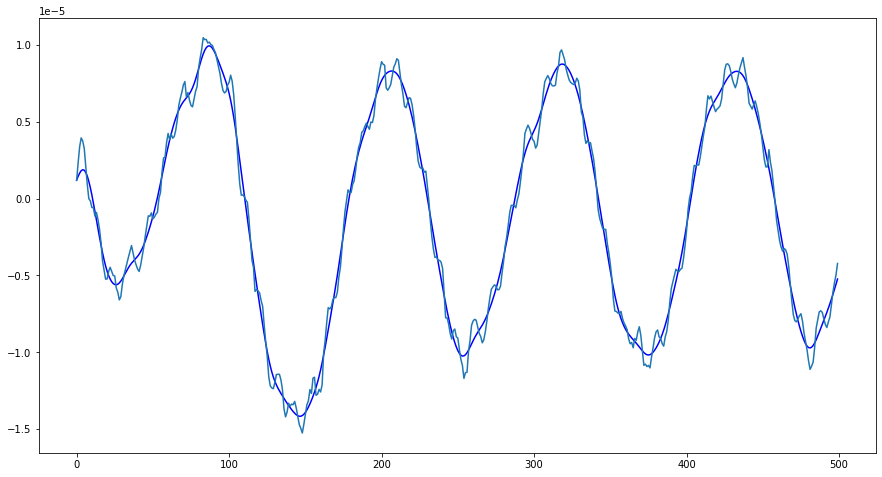

In [65]:
import scipy.signal as signal

# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.1# Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A, ax)
plt.figure(figsize=(15,8))
plt.plot(smooth_data[:500],'b-')
plt.plot(ax[:500])
plt.show()

In [66]:
dax = first_order_diff(ax.reshape((1, -1)), 0.000195).transpose()
ddax = second_order_diff(ax.reshape((1, -1)), 0.000195).transpose()
print(dax.shape)
print(ddax.shape)

(56316, 1)
(56316, 1)


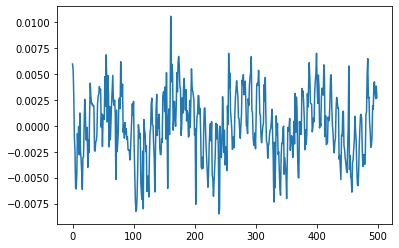

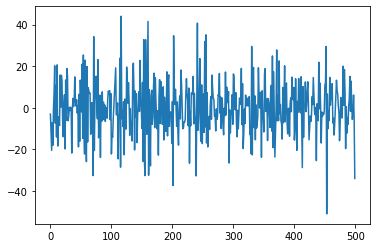

In [67]:
plt.plot(dax[:500])
plt.show()
plt.plot(ddax[:500])

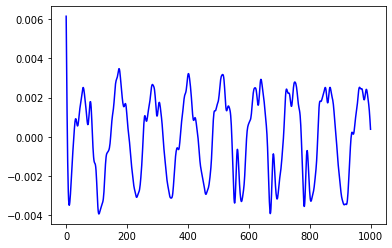

In [68]:
smooth_dax = signal.filtfilt(B,A, dax.flatten())
plt.plot(smooth_dax[:1000],'b-')

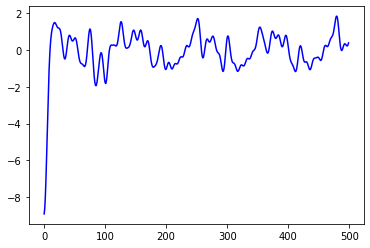

In [69]:
smooth_ddax = first_order_diff(smooth_dax.reshape((1, -1)), 0.000195).transpose()
plt.plot(smooth_ddax[:500],'b-')

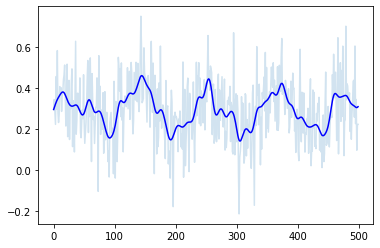

In [71]:
f_ax = df["f_ax"].values

smooth_f_ax = signal.filtfilt(B,A, f_ax)
plt.plot(f_ax[:500], alpha=0.2)
plt.plot(smooth_f_ax[:500],'b-')

NameError: name 'ax' is not defined